In [0]:
!cp /content/drive/My\ Drive/ASV/features_csv/dataset_dev_new.csv /content/dataset_dev_new.csv
!cp /content/drive/My\ Drive/ASV/features_csv/dataset_train_new.csv /content/dataset_train_new.csv
!cp /content/drive/My\ Drive/ASV/features_csv/dataset_eval_new.csv /content/dataset_eval_new.csv

In [0]:
import pandas as pd
import os
from matplotlib import pyplot as plt
import numpy as np
from pathlib import Path
import tensorflow as tf
import shutil
from tqdm import tqdm_notebook
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn import svm
from sklearn import metrics

In [0]:
data = pd.read_csv('dataset_train_new.csv')
data = data.drop(['filename'],axis=1)
genre_list = data.iloc[:, -1]
encoder = LabelEncoder()
y_train = encoder.fit_transform(genre_list)
scaler = StandardScaler()
X_train = scaler.fit_transform(np.array(data.iloc[:, :-1], dtype = float))

data = pd.read_csv('dataset_dev_new.csv')
data = data.drop(['filename'],axis=1)
genre_list = data.iloc[:, -1]
encoder = LabelEncoder()
y_dev = encoder.fit_transform(genre_list)
scaler = StandardScaler()
X_dev = scaler.fit_transform(np.array(data.iloc[:, :-1], dtype = float))

data = pd.read_csv('dataset_eval_new.csv')
data = data.drop(['filename'],axis=1)
genre_list = data.iloc[:, -1]
encoder = LabelEncoder()
y_eval = encoder.fit_transform(genre_list)
scaler = StandardScaler()
X_eval = scaler.fit_transform(np.array(data.iloc[:, :-1], dtype = float))

In [4]:
clf = svm.SVC(kernel='linear')
clf.fit(X_train, y_train)
y_pred = clf.predict(X_train)
print('Train')
print("Accuracy:",metrics.accuracy_score(y_train, y_pred))
print()
y_pred = clf.predict(X_dev)
print('Dev')
print("Accuracy:",metrics.accuracy_score(y_dev, y_pred))
print()
y_pred = clf.predict(X_eval)
print('Eval')
print("Accuracy:",metrics.accuracy_score(y_eval, y_pred))

Train
Accuracy: 0.8492513152569809

Dev
Accuracy: 0.8166047087980174

Eval
Accuracy: 0.782228490832158


In [0]:
import matplotlib.pyplot as plt

In [0]:
feature_names = ["rmse",	"spectral_centroid",	"spectral_bandwidth",	"rolloff",	"zero_crossing_rate",	"chroma_stft1",	"chroma_stft2",	"chroma_stft3",	"chroma_stft4",	"chroma_stft5",	"chroma_stft6",	"chroma_stft7",	"chroma_stft8",	"chroma_stft9",	"chroma_stft10", "chroma_stft11",	"chroma_stft12",	"mfcc1",	"mfcc2",	"mfcc3",	"mfcc4",	"mfcc5",	"mfcc6",	"mfcc7",	"mfcc8", "mfcc9",	"mfcc10",	"mfcc11",	"mfcc12",	"mfcc13",	"mfcc14",	"mfcc15", "mfcc16",	"mfcc17",	"mfcc18",	"mfcc19"	, "mfcc20"]

In [0]:
##Feature Importance using multiple methods like:
#  1.Filter Method
#  2. Wrapper Method
#  3. Embedded Method

In [6]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib
import seaborn as sns
import statsmodels.api as sm
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [15]:
df = pd.DataFrame(X_train, columns = feature_names)
X = X_train  #Feature Matrix
#y = y_train    #Target Variable
df['label'] = y_train
df.head()

,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,chroma_stft1,chroma_stft2,chroma_stft3,chroma_stft4,chroma_stft5,chroma_stft6,chroma_stft7,chroma_stft8,chroma_stft9,chroma_stft10,chroma_stft11,chroma_stft12,mfcc1,mfcc2,mfcc3,mfcc4,mfcc5,mfcc6,mfcc7,mfcc8,mfcc9,mfcc10,mfcc11,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,label
0,-0.436025,-0.622588,0.243690,-0.346758,-0.822654,0.534367,0.971068,0.365371,1.097572,1.536259,1.318546,0.951221,1.170734,1.237138,0.423139,0.086773,0.071938,-0.372636,-0.298617,1.309558,-1.231502,0.170063,0.835883,0.986539,0.705937,0.263889,-0.770308,0.152312,-1.627719,-1.375690,0.852379,1.083631,1.508335,0.613520,0.744401,0.526601,-1.026659,1
1,-0.962600,0.305028,0.501700,0.618614,0.299667,-0.566279,-1.307688,-0.847216,0.180276,1.446841,0.603135,0.006707,-0.553511,-0.729923,-0.695312,0.122931,0.288921,-0.516706,-1.128180,0.771643,-1.170459,1.357405,-0.906200,-2.842021,-0.545104,2.560494,0.344677,0.282062,0.342635,-1.868917,-0.139279,0.476671,0.409246,0.372377,1.181295,-0.645586,-0.336530,1
2,-0.153867,0.477614,0.942822,0.772052,0.118152,-0.361225,-0.651631,-0.414878,-0.567028,-0.739324,-0.985294,-1.104816,0.492647,1.352892,0.438398,-0.376611,-0.826052,0.354086,-0.256435,-0.289705,1.093677,-0.964632,-0.035425,-0.409695,0.865639,0.357231,-0.715624,-0.339966,-0.739437,0.319295,-0.292331,-0.608651,0.102880,0.019297,-0.288561,-0.327627,0.385974,1
3,-0.829894,0.241570,1.158023,0.515691,0.108627,-0.010746,-0.446129,-0.545943,-0.843412,-0.628438,-0.052187,-0.093501,-0.131951,0.012090,0.715755,0.915321,0.715376,-1.133926,-1.496896,0.446696,-0.430859,-0.722957,0.476381,0.617871,0.968369,0.323684,0.425249,-0.328376,0.344482,0.139566,0.189072,1.738345,0.019865,1.447505,0.434674,-0.069108,0.881063,1
4,0.154381,-0.392657,0.375116,-0.246126,-0.200683,-2.347480,-1.862819,-1.691629,-1.562236,-0.340522,1.074191,1.302245,1.235517,-0.306312,-1.338864,-1.943415,-2.318345,0.162498,0.383004,0.470637,-0.754849,-0.302848,0.556981,-1.286219,1.455117,-0.087749,0.739501,0.651754,-1.344697,-0.543386,-2.063682,-0.398457,-0.653272,-0.855781,-0.657659,-1.262650,0.085744,1


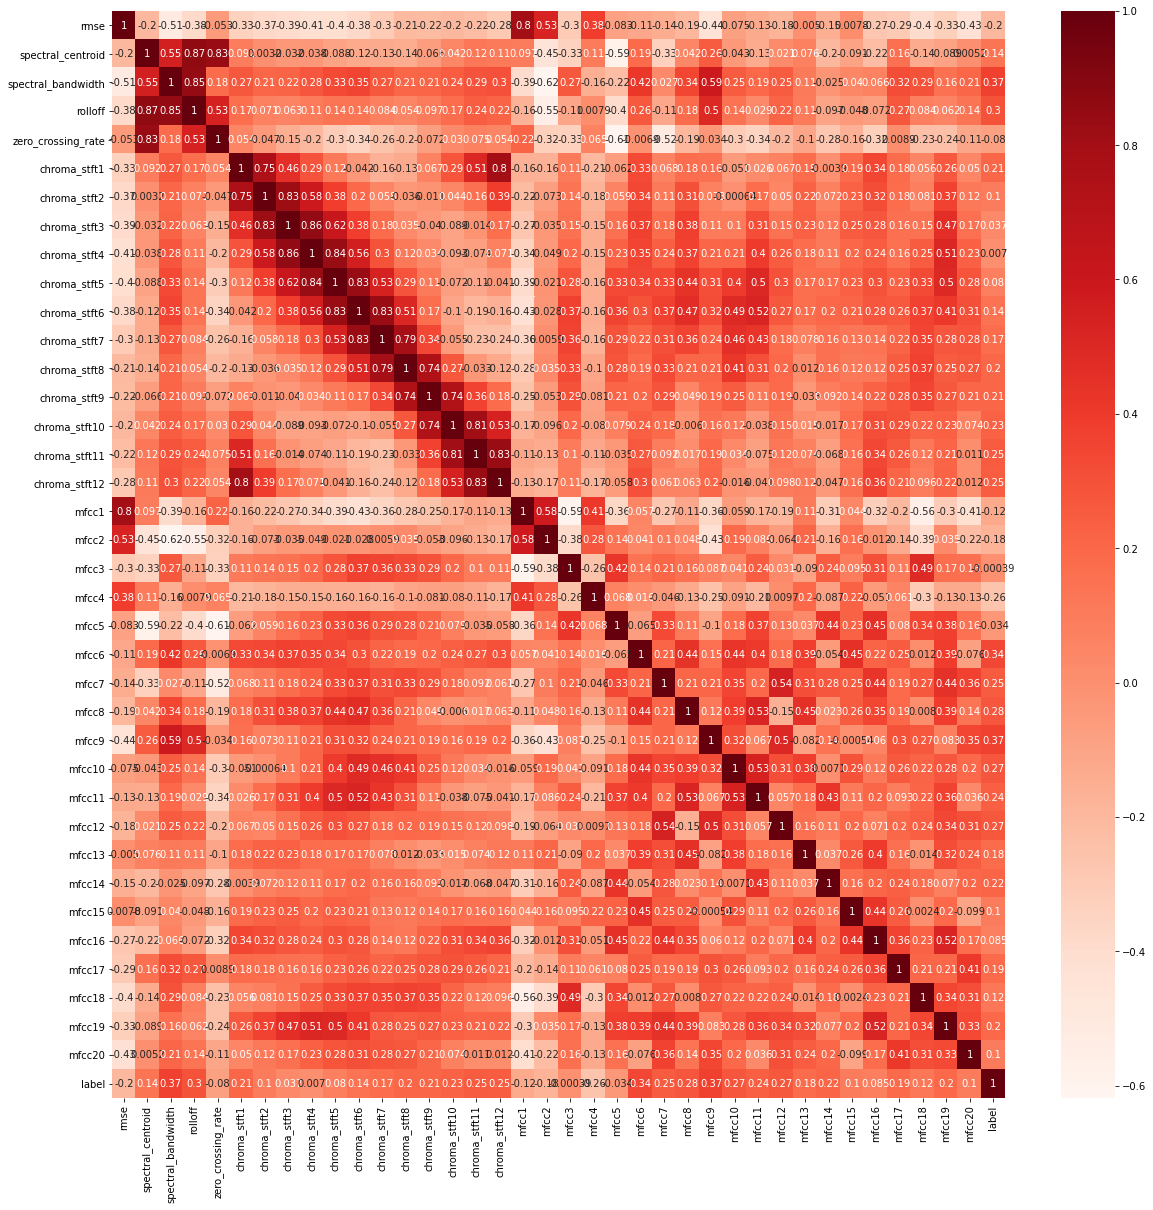

In [18]:
# 1. Filter Method 

#Using Pearson Correlation
plt.figure(figsize=(20,20))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.savefig("Correlation_plot")
plt.show()

In [19]:
"""The correlation coefficient has values between -1 to 1
— A value closer to 0 implies weaker correlation (exact 0 implying no correlation)
— A value closer to 1 implies stronger positive correlation
— A value closer to -1 implies stronger negative correlation
"""

'The correlation coefficient has values between -1 to 1\n— A value closer to 0 implies weaker correlation (exact 0 implying no correlation)\n— A value closer to 1 implies stronger positive correlation\n— A value closer to -1 implies stronger negative correlation\n'

In [22]:
#Correlation with output variable
cor_target = abs(cor["label"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.5]
print(relevant_features)


# Due to large number of features, no strong correlation.

label    1.0
Name: label, dtype: float64


In [0]:
# 2. Wrapper Method

In [0]:
# Forward Elimination

In [0]:
X = pd.DataFrame(X_train, columns = feature_names)

In [0]:
def forward_selection(data, target, significance_level=0.05):
    initial_features = data.columns.tolist()
    best_features = []
    while (len(initial_features)>0):
        remaining_features = list(set(initial_features)-set(best_features))
        new_pval = pd.Series(index=remaining_features)
        for new_column in remaining_features:
            model = sm.OLS(target, sm.add_constant(data[best_features+[new_column]])).fit()
            new_pval[new_column] = model.pvalues[new_column]
        min_p_value = new_pval.min()
        if(min_p_value<significance_level):
            best_features.append(new_pval.idxmin())
        else:
            break
    return best_features

In [10]:
forward_selection(X,y_train)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  


['spectral_bandwidth',
 'mfcc7',
 'mfcc4',
 'mfcc3',
 'mfcc14',
 'mfcc6',
 'chroma_stft4',
 'zero_crossing_rate',
 'mfcc12',
 'mfcc8',
 'chroma_stft9',
 'mfcc2',
 'chroma_stft1',
 'mfcc16',
 'mfcc11',
 'mfcc15',
 'mfcc20',
 'mfcc18',
 'chroma_stft7',
 'chroma_stft11',
 'mfcc1',
 'mfcc5',
 'rmse',
 'chroma_stft6',
 'mfcc9',
 'chroma_stft5']

In [0]:
#importing the necessary libraries
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.linear_model import LinearRegression
# Sequential Forward Selection(sfs)
sfs = SFS(LinearRegression(),
           k_features=37,
           forward=True,
           floating=False,
           scoring = 'r2',
           cv = 0)

In [26]:
sfs.fit(X_train, y_train)
sfs.k_feature_names_     # to get the final set of features

('0',
 '1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 '10',
 '11',
 '12',
 '13',
 '14',
 '15',
 '16',
 '17',
 '18',
 '19',
 '20',
 '21',
 '22',
 '23',
 '24',
 '25',
 '26',
 '27',
 '28',
 '29',
 '30',
 '31',
 '32',
 '33',
 '34',
 '35',
 '36')

In [11]:
#Sequential backward selection(sbs)
sbs = SFS(LinearRegression(), 
          k_features=37, 
          forward=False, 
          floating=False,
          cv=0)
sbs.fit(X_train, y_train)
sbs.k_feature_names_

('0',
 '1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 '10',
 '11',
 '12',
 '13',
 '14',
 '15',
 '16',
 '17',
 '18',
 '19',
 '20',
 '21',
 '22',
 '23',
 '24',
 '25',
 '26',
 '27',
 '28',
 '29',
 '30',
 '31',
 '32',
 '33',
 '34',
 '35',
 '36')

In [59]:
sfs1 = SFS(LinearRegression(), 
          k_features=(1,37), 
          forward=True, 
          floating=False,
          cv=0)
sfs1.fit(X_train, y_train)

SequentialFeatureSelector(clone_estimator=True, cv=0,
                          estimator=LinearRegression(copy_X=True,
                                                     fit_intercept=True,
                                                     n_jobs=None,
                                                     normalize=False),
                          floating=False, forward=True, k_features=(1, 37),
                          n_jobs=1, pre_dispatch='2*n_jobs', scoring=None,
                          verbose=0)

/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:217: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


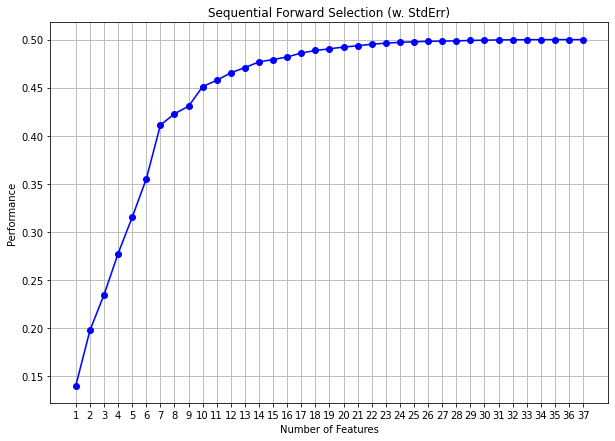

In [57]:
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs

fig1 = plot_sfs(sfs1.get_metric_dict(), kind='std_dev')
fig1.set_size_inches(10, 7)
plt.title('Sequential Forward Selection (w. StdErr)')
plt.grid()
#plt.savefig("forward_selection")
plt.show()

In [51]:
sbs1 = SFS(LinearRegression(), 
          k_features=(1,37), 
          forward=False, 
          floating=False,
          cv=0)
sbs1.fit(X_train, y_train)

SequentialFeatureSelector(clone_estimator=True, cv=0,
                          estimator=LinearRegression(copy_X=True,
                                                     fit_intercept=True,
                                                     n_jobs=None,
                                                     normalize=False),
                          floating=False, forward=False, k_features=(1, 37),
                          n_jobs=1, pre_dispatch='2*n_jobs', scoring=None,
                          verbose=0)

/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:217: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


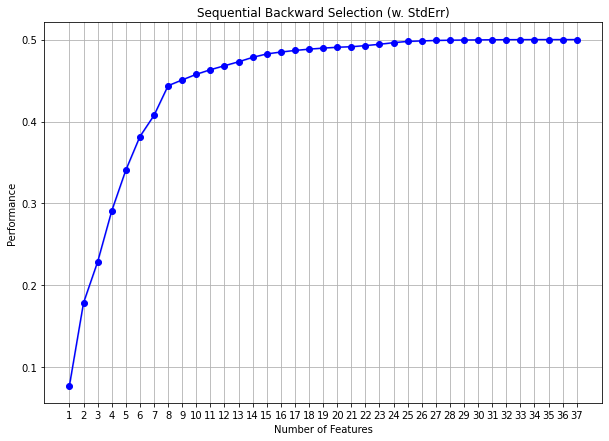

In [53]:
fig1 = plot_sfs(sbs1.get_metric_dict(), kind='std_dev')
fig1.set_size_inches(10, 7)
plt.title('Sequential Backward Selection (w. StdErr)')
plt.grid()
plt.savefig("backward_selection")
plt.show()

In [0]:
# i. Backward Elimination

In [25]:
"""we feed all the possible features to the model at first. We check the performance of the model and then 
iteratively remove the worst performing features one by one till the overall performance of the model comes 
in acceptable range. The performance metric used here to evaluate feature performance is pvalue. 
If the pvalue is above 0.05 then we remove the feature, else we keep it. """

'we feed all the possible features to the model at first. We check the performance of the model and then \niteratively remove the worst performing features one by one till the overall performance of the model comes \nin acceptable range. The performance metric used here to evaluate feature performance is pvalue. \nIf the pvalue is above 0.05 then we remove the feature, else we keep it. '

In [26]:
"""We will first run one iteration here just to get an idea of the concept and then we will run the same 
code in a loop, which will give the final set of features. Here we are using OLS model which stands for 
“Ordinary Least Squares”. This model is used for performing linear regression."""

'We will first run one iteration here just to get an idea of the concept and then we will run the same \ncode in a loop, which will give the final set of features. Here we are using OLS model which stands for \n“Ordinary Least Squares”. This model is used for performing linear regression.'

In [27]:
#Adding constant column of ones, mandatory for sm.OLS model
X_1 = sm.add_constant(X_train)
#Fitting sm.OLS model
model = sm.OLS(y_train,X_1).fit()
print(model.pvalues)

[0.00000000e+00 1.16701451e-04 6.94376429e-01 4.67583013e-02
 9.81702284e-01 4.26764370e-10 9.64910497e-04 9.37087687e-01
 6.50304749e-01 2.37057985e-14 3.27315293e-02 1.50120774e-04
 2.08681284e-07 3.96099346e-02 2.57214287e-05 7.53100117e-02
 2.87023263e-03 3.17389935e-01 3.11189789e-08 1.94716784e-12
 1.23483150e-49 8.04636736e-27 4.29169298e-01 7.96124720e-31
 4.14805537e-03 1.95620478e-26 6.57908173e-04 3.83382325e-03
 3.58972973e-10 5.21367913e-20 1.33685318e-02 2.91879379e-24
 1.52562706e-08 7.61029232e-01 4.87114829e-03 2.19537283e-05
 2.31535325e-01 8.19073852e-05]


In [29]:
p_value_df = pd.DataFrame(feature_names, columns = ['Features'])
p_value_df["p_values"]=model.pvalues[1:]
print(p_value_df)

              Features      p_values
0                 rmse  1.167015e-04
1    spectral_centroid  6.943764e-01
2   spectral_bandwidth  4.675830e-02
3              rolloff  9.817023e-01
4   zero_crossing_rate  4.267644e-10
5         chroma_stft1  9.649105e-04
6         chroma_stft2  9.370877e-01
7         chroma_stft3  6.503047e-01
8         chroma_stft4  2.370580e-14
9         chroma_stft5  3.273153e-02
10        chroma_stft6  1.501208e-04
11        chroma_stft7  2.086813e-07
12        chroma_stft8  3.960993e-02
13        chroma_stft9  2.572143e-05
14       chroma_stft10  7.531001e-02
15       chroma_stft11  2.870233e-03
16       chroma_stft12  3.173899e-01
17               mfcc1  3.111898e-08
18               mfcc2  1.947168e-12
19               mfcc3  1.234831e-49
20               mfcc4  8.046367e-27
21               mfcc5  4.291693e-01
22               mfcc6  7.961247e-31
23               mfcc7  4.148055e-03
24               mfcc8  1.956205e-26
25               mfcc9  6.579082e-04
2

In [31]:
"""we will remove this feature and build the model once again. This is an iterative process and can be 
performed at once with the help of loop. """

X = pd.DataFrame(X_train, columns = feature_names)
#Backward Elimination
cols = list(X.columns)
pmax = 1
while (len(cols)>0):
    p= []
    X_1 = X[cols]
    X_1 = sm.add_constant(X_1)
    model = sm.OLS(y,X_1).fit()
    p = pd.Series(model.pvalues.values[1:],index = cols)      
    pmax = max(p)
    feature_with_p_max = p.idxmax()
    if(pmax>0.05):
        cols.remove(feature_with_p_max)
    else:
        break
selected_features_BE = cols
print(selected_features_BE)

['rmse', 'spectral_bandwidth', 'zero_crossing_rate', 'chroma_stft1', 'chroma_stft4', 'chroma_stft5', 'chroma_stft6', 'chroma_stft7', 'chroma_stft9', 'chroma_stft11', 'mfcc1', 'mfcc2', 'mfcc3', 'mfcc4', 'mfcc6', 'mfcc7', 'mfcc8', 'mfcc9', 'mfcc10', 'mfcc11', 'mfcc12', 'mfcc13', 'mfcc14', 'mfcc15', 'mfcc17', 'mfcc18', 'mfcc20']


In [0]:
# ii. RFE (Recursive Feature Elimination)

In [65]:
"""The Recursive Feature Elimination (RFE) method works by recursively removing attributes and building 
a model on those attributes that remain. It uses accuracy metric to rank the feature according to their 
importance. The RFE method takes the model to be used and the number of required features as input. 
It then gives the ranking of all the variables, 1 being most important. It also gives its support, True 
being relevant feature and False being irrelevant feature.
"""

'The Recursive Feature Elimination (RFE) method works by recursively removing attributes and building \na model on those attributes that remain. It uses accuracy metric to rank the feature according to their \nimportance. The RFE method takes the model to be used and the number of required features as input. \nIt then gives the ranking of all the variables, 1 being most important. It also gives its support, True \nbeing relevant feature and False being irrelevant feature.\n'

In [66]:
model = LinearRegression()
#Initializing RFE model
rfe = RFE(model, 37)
#Transforming data using RFE
X_rfe = rfe.fit_transform(X_train,y_train)  
#Fitting the data to model
model.fit(X_rfe,y_train)
print(rfe.support_)
print(rfe.ranking_)

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [67]:
"""Here we took LinearRegression model with 37 features and RFE gave feature ranking as above, 
but the selection of number ‘37’ was random. Now we need to find the optimum number of features, 
for which the accuracy is the highest. We do that by using loop starting with 1 feature and going 
up to 37. We then take the one for which the accuracy is highest.
"""

'Here we took LinearRegression model with 37 features and RFE gave feature ranking as above, \nbut the selection of number ‘37’ was random. Now we need to find the optimum number of features, \nfor which the accuracy is the highest. We do that by using loop starting with 1 feature and going \nup to 37. We then take the one for which the accuracy is highest.\n'

In [68]:
#no of features
nof_list=np.arange(1,37)            
high_score=0
#Variable to store the optimum features
nof=0           
score_list =[]
for n in range(len(nof_list)):
    #X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 0)
    model = LinearRegression()
    rfe = RFE(model,nof_list[n])
    X_train_rfe = rfe.fit_transform(X_train,y_train)
    X_test_rfe = rfe.transform(X_eval)
    model.fit(X_train_rfe,y_train)
    score = model.score(X_test_rfe,y_eval)
    score_list.append(score)
    if(score>high_score):
        high_score = score
        nof = nof_list[n]
print("Score list for n features starting with 1 to 37: ",score_list)
print("Optimum number of features: %d" %nof)
print("Score with %d features: %f" % (nof, high_score))

Score list for n features starting with 1 to 37:  [0.13545359503800947, 0.24569133133937526, 0.20017842446096568, 0.24292117438700778, 0.27301266233794086, 0.30815054798441555, 0.328661049137292, 0.3069694203982951, 0.29802327572243004, 0.2849990700114825, 0.31937658252706336, 0.33729612018542343, 0.3409599052207225, 0.330275948294076, 0.3290238026068977, 0.30835421955841147, 0.31750793643670977, 0.31981915300017594, 0.319624190897554, 0.3155668188616815, 0.3248936614739594, 0.31134257366713636, 0.3062642932708373, 0.30844121207608843, 0.29559781731737533, 0.29020670949275484, 0.29860084164503287, 0.29625879978582464, 0.29643940131568236, 0.29598824296268905, 0.2955780166981181, 0.2966332041636013, 0.2937950652711422, 0.29483036398882384, 0.2927989715867557, 0.2929214107379473]
Optimum number of features: 13
Score with 13 features: 0.340960


In [0]:
no_list = range(1,37)

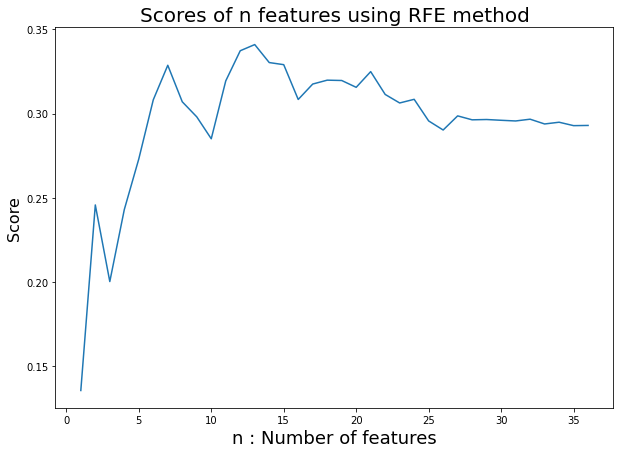

In [90]:
plt.figure(figsize=(10,7))
plt.title("Scores of n features using RFE method", fontsize=20)
plt.xlabel('n : Number of features', fontsize=18)
plt.ylabel('Score', fontsize=16)
plt.plot(no_list,score_list)
plt.savefig("rfe_graph")

In [69]:
"""
As seen from above code, the optimum number of features is 13. We now feed 13 as number of features to RFE 
and get the final set of features given by RFE method, as follows:
"""

'\nAs seen from above code, the optimum number of features is 13. We now feed 13 as number of features to RFE \nand get the final set of features given by RFE method, as follows:\n'

In [72]:
X = pd.DataFrame(X_train, columns = feature_names)
cols = list(X.columns)
model = LinearRegression()
#Initializing RFE model
rfe = RFE(model, 13)             
#Transforming data using RFE
X_rfe = rfe.fit_transform(X,y_train)  
#Fitting the data to model
model.fit(X_rfe,y_train)              
temp = pd.Series(rfe.support_,index = cols)
selected_features_rfe = temp[temp==True].index
print(selected_features_rfe)

Index(['spectral_bandwidth', 'zero_crossing_rate', 'chroma_stft4',
       'chroma_stft6', 'chroma_stft7', 'chroma_stft9', 'mfcc2', 'mfcc3',
       'mfcc4', 'mfcc6', 'mfcc8', 'mfcc12', 'mfcc14'],
      dtype='object')


In [0]:
# 3. Embedded Method

In [0]:
"""
Embedded methods are iterative in a sense that takes care of each iteration of the model training process 
and carefully extract those features which contribute the most to the training for a particular iteration. 
Regularization methods are the most commonly used embedded methods which penalize a feature given a coefficient 
threshold. Here we will do feature selection using Lasso regularization. If the feature is irrelevant, 
lasso penalizes it’s coefficient and make it 0. Hence the features with coefficient = 0 are removed and the rest 
are taken."""

In [7]:
X = pd.DataFrame(X_train, columns = feature_names)
y = y_train
reg = LassoCV()
reg.fit(X, y)
print("Best alpha using built-in LassoCV: %f" % reg.alpha_)
print("Best score using built-in LassoCV: %f" %reg.score(X,y))
coef = pd.Series(reg.coef_, index = X.columns)

Best alpha using built-in LassoCV: 0.000187
Best score using built-in LassoCV: 0.499688


In [8]:
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

Lasso picked 36 variables and eliminated the other 1 variables


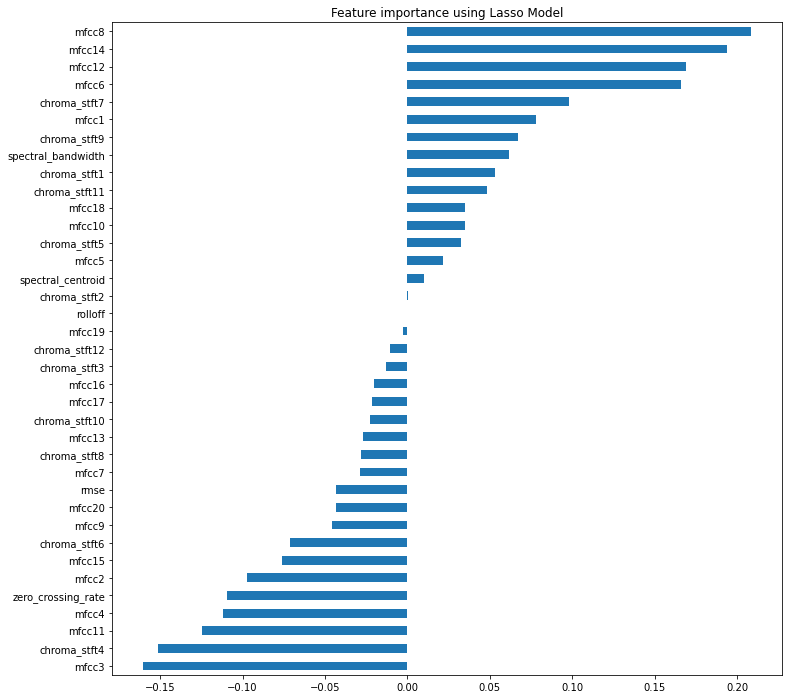

In [12]:
imp_coef = coef.sort_values()
import matplotlib
#matplotlib.rcParams['figure.figsize'] = (10.0, 10.0)
plt.figure(figsize=(12,12))
imp_coef.plot(kind = "barh")
plt.title("Feature importance using Lasso Model")
plt.savefig("final_Embedded_Lasso_model")

In [0]:
"""
Here Lasso model has taken all the features except rolloff."""

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
No handles with labels found to put in legend.


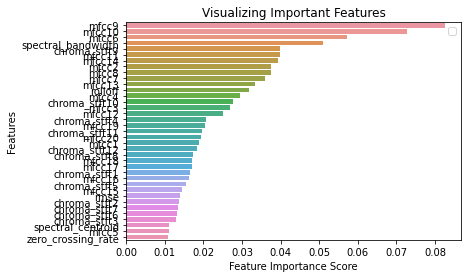

In [8]:
# random forest

from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

import pandas as pd
feature_imp = pd.Series(clf.feature_importances_,index=feature_names).sort_values(ascending=False)


No handles with labels found to put in legend.


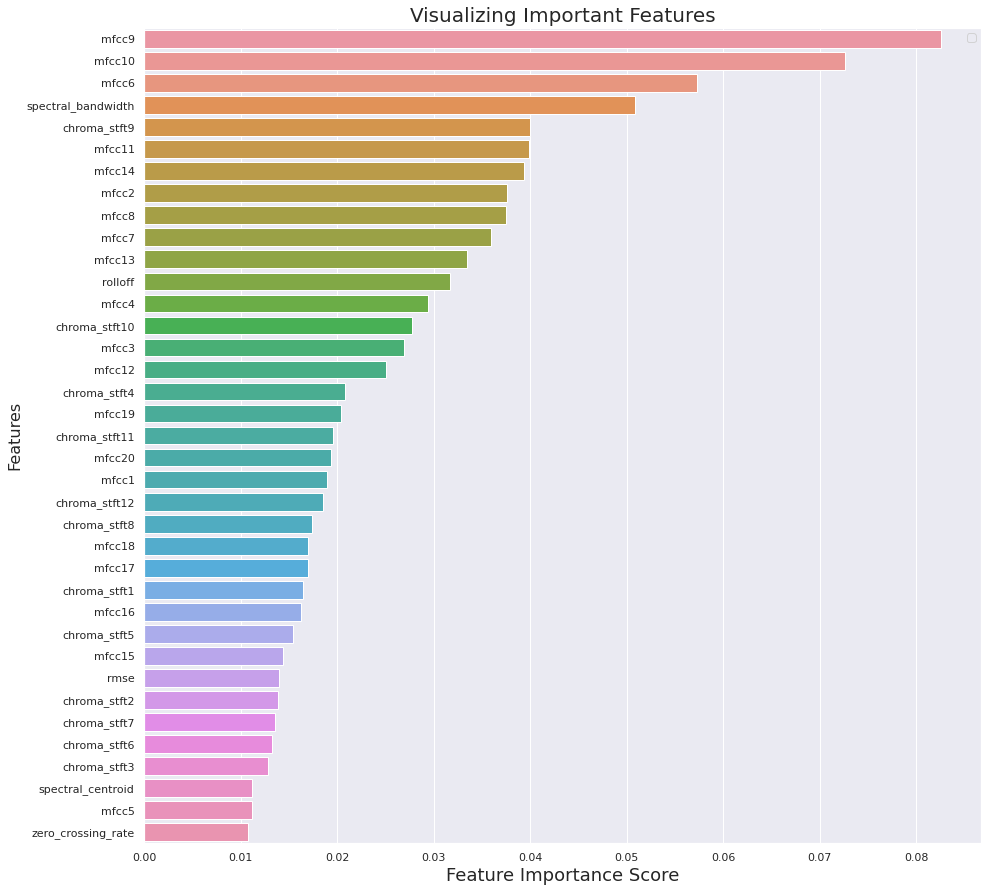

In [26]:
import seaborn as sns
%matplotlib inline
# Creating a bar plot
plt.figure(figsize=(15,15))
sns.barplot(x=feature_imp, y=feature_imp.index)

# Add labels to your graph
plt.xlabel('Feature Importance Score', fontsize=18)
plt.ylabel('Features', fontsize=16)
plt.title("Visualizing Important Features", fontsize=20)
plt.legend()
plt.savefig("rf_imp_features")
plt.show()

In [22]:
# prediction on test set
y_pred=clf.predict(X_eval)

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_eval, y_pred))

Accuracy: 0.8114950634696756


In [0]:
# SHAP: Reliable feature importances from tree models

In [62]:
!pip install shap

     |████████████████████████████████| 276kB 2.8MB/s 
  Created wheel for shap: filename=shap-0.35.0-cp36-cp36m-linux_x86_64.whl size=394117 sha256=714f6e76ac93a187efd379aaf6efe173d3d8b62d6e5e2758305b34a96f70bf9d
  Stored in directory: /root/.cache/pip/wheels/e7/f7/0f/b57055080cf8894906b3bd3616d2fc2bfd0b12d5161bcb24ac
Successfully built shap


Setting feature_perturbation = "tree_path_dependent" because no background data was given.


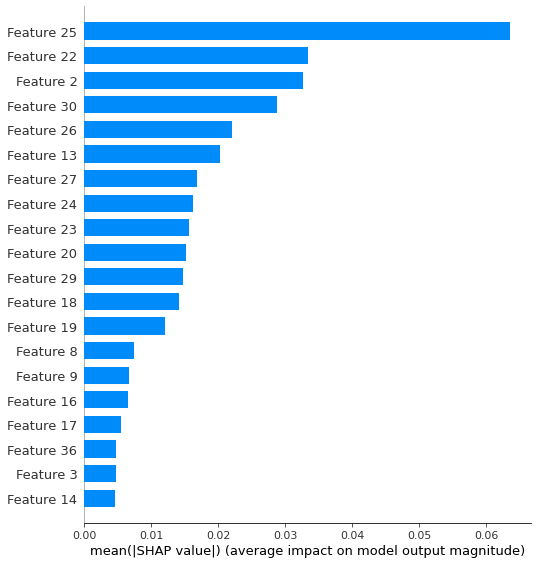

In [63]:
import xgboost
import shap
# load JS visualization code to notebook
shap.initjs()
# train XGBoost model
model = xgboost.train({"learning_rate": 0.01}, xgboost.DMatrix(X_train, label=y_train), 100)
# explain the model's predictions using SHAP values
# (same syntax works for LightGBM, CatBoost, and scikit-learn models)
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_train)
shap.summary_plot(shap_values, X_train, plot_type="bar")